In [2]:
import numpy as np
import cv2
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import tkinter
from tkinter import filedialog
tkinter.Tk().withdraw() # prevents an empty tkinter window from appearing

''

In [10]:
path1 = filedialog.askdirectory(title="Main Images")
path2=filedialog.askdirectory(title="Images to store positive predictions")
path3=filedialog.askdirectory(title="Images to store negative predictions")
path4=filedialog.askdirectory(title="Blue Nuclei")
#path4=filedialog.askdirectory()

In [11]:
path1

'/home/saab/Desktop/Validation_Pred_tiled/Serial'

In [12]:
img_list1=sorted(glob(path1+"/*"))
img_list2=sorted(glob(path4+"/*"))
print(path2)
print(len(img_list1))
print(len(img_list2))
if(len(img_list1)==len(img_list2)):
    print("*******ALL GOOD*******")
else:
    print("Check for file size")

/home/saab/Desktop/Validation_Pred_IoU_new/Serial/CD3P
48
48
*******ALL GOOD*******


In [13]:
img_list2[0:10]

['/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/000.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/001.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/002.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/003.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/004.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/005.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/006.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/007.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/008.npy',
 '/home/saab/Desktop/gt_validation/11-15-2022-10-25/all_blue_nuclei/009.npy']

In [14]:

for y in range(len(img_list1)):


    img=cv2.imread(img_list1[y]) #Read H&E overlapped image
    bn=np.load(img_list2[y]) #Read blue nuclei
    #img=cv2.resize(img,(bn.shape[1],bn.shape[0]))
    print(y)
    b,g,r=cv2.split(img) #Get red channel
    ret,thresh1 = cv2.threshold(r,2,255,cv2.THRESH_BINARY) #Threshold
    
    
    pred=bn*np.logical_and(bn,thresh1)
    np.save(path2+"/"+img_list2[y].split("/")[-1],pred)
    pred2=bn-pred
    np.save(path3+"/"+img_list2[y].split("/")[-1],pred2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [15]:
img.shape

(5376, 5120, 3)

In [16]:
img_list1[0]

'/home/saab/Desktop/Validation_Pred_tiled/Same/000.png'

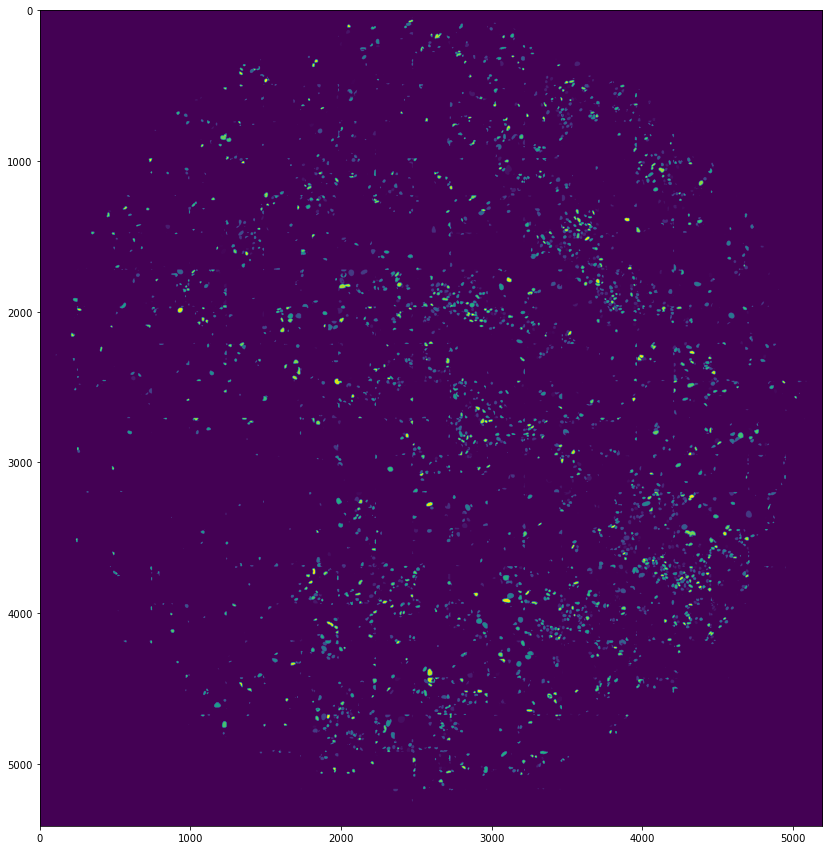

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(pred)

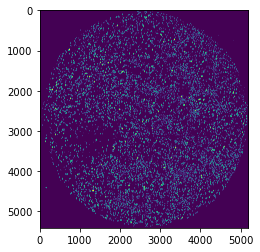

In [31]:
plt.imshow(bn)